Digital audio basics
Audio representation in computers

In [1]:
# import libraries for manipulating arrays and plotting graphs
import numpy as np
import matplotlib.pyplot as plt

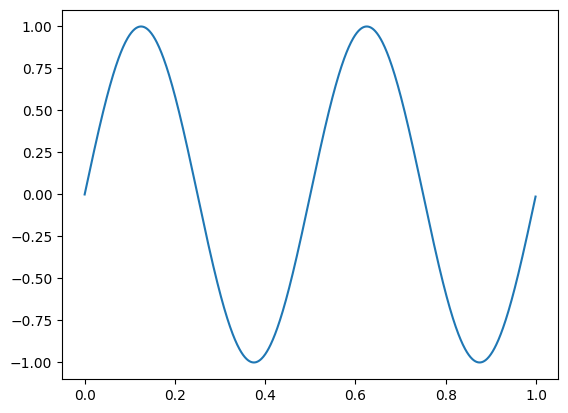

In [2]:
# Sampling rate - aliasing - sampling (Nyquist) theorem
# assume a sample rate of 1000, i.e. sampling 1000 times per second
sr = 1000
# construct a 1-sec time array that corresponds to this sample rate
t = np.arange(sr)/sr # question: how can we represent 2 seconds of audio? 2.3 secs?
# let's construct an audio array of one second with frequency 2
f = 2
s = np.sin( 2*np.pi*f*t )
plt.plot( t , s )

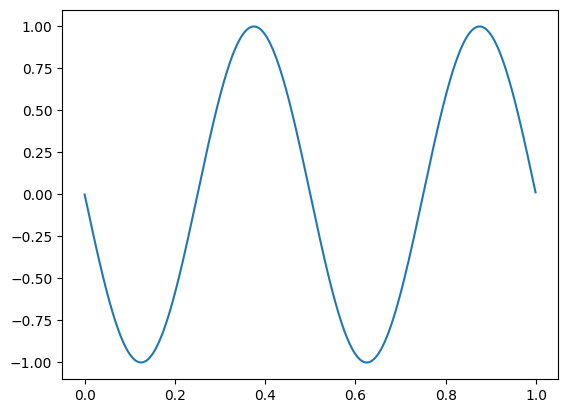

In [3]:
# now let's construct an audio array of one second with frequency 998
f = 998
s = np.sin( 2*np.pi*f*t )
plt.plot( t , s )
# what's going on?

<IPython.core.display.Javascript object>


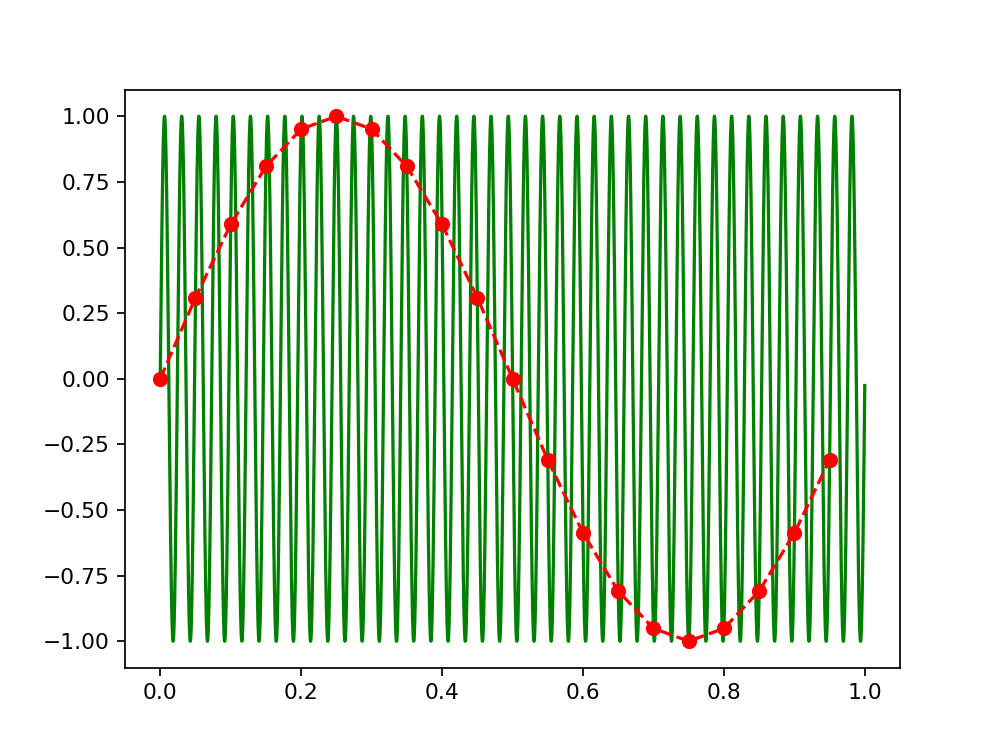

interactive(children=(IntSlider(value=0, description='f', max=50), Output()), _dom_classes=('widget-interact',…

<function __main__.change_freq(f=2)>

In [4]:
# see the following link to activate the interactive environment:
# https://ipywidgets.readthedocs.io/en/latest/user_install.html
# if using conda, make sure last version of matplolib is installed in conda
# conda install matplotlib
# conda update matplolib
%matplotlib notebook
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# assume an the approximation of an analog signal, using higher sample rate
analog_sr = 10000
# assume 1 second of an 'analog' recording
analog_t = np.arange( analog_sr )/analog_sr
# with frequency 50
f_real = 2
analog_s = np.sin( 2*np.pi*f_real*analog_t )
# plot it
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
line_analog, = ax.plot( analog_t , analog_s, 'g' )
# assume that we are sampling at 100
digital_sr = 20
digital_t = np.arange( digital_sr )/digital_sr
# from analog_s, sample
digital_idxs = np.floor( digital_t*analog_sr ).astype(int)
digital_s = analog_s[ digital_idxs ]
line_digital, = ax.plot( digital_t , digital_s, 'ro--' )
# plt.savefig('aliasing.png', dpi=300)

def change_freq(f=2):
    analog_s = np.sin( 2*np.pi*f*analog_t )
    line_analog.set_ydata( analog_s )
    digital_s = analog_s[ digital_idxs ]
    line_digital.set_ydata( digital_s )
    # fig.canvas.draw()
    fig.show()
    return f

# w = widgets.IntSlider(min=0, max=50, step=1, value=10)
# display(w)
interact(change_freq, f=widgets.IntSlider(min=0, max=50, step=1, value=0))